In [ ]:
#                                                                                    ASSIGNMENT
#                                                                                     LAB 7
#                                                                                     DAB 311



#                                                                                ANKITA VASHISHT
#                                                                                    W0854392

# Importing Libraries

In [1]:
import time
import matplotlib.pyplot as plt

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Force TF to use only the CPU

import sys
print(sys.version)

import numpy as np
print(np.__version__)

import tensorflow as tf
print(tf.__version__)


import keras


3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.25.2
2.15.0


In [2]:
# keras functions
from keras.datasets import mnist
from keras.utils import to_categorical

from keras import layers
from keras import models

#from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model

# Instantiating a Small Convnet
- A convnet takes as input tensors of shape (image_height, image_width, image_channels) (not including the batch dimension)


In [3]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
Total params: 55744 (217.75 KB)
Trainable params: 55744 

In [4]:
# adding a classifier on top of the convnet
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# 10-way classification, using a final layer with 10 outputs and a softmax activation
model.add(layers.Dense(10, activation='softmax'))

# (3, 3, 64) outputs are flattened into vectors of shape (576,) before going through two Dense layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

## Plotting the Network

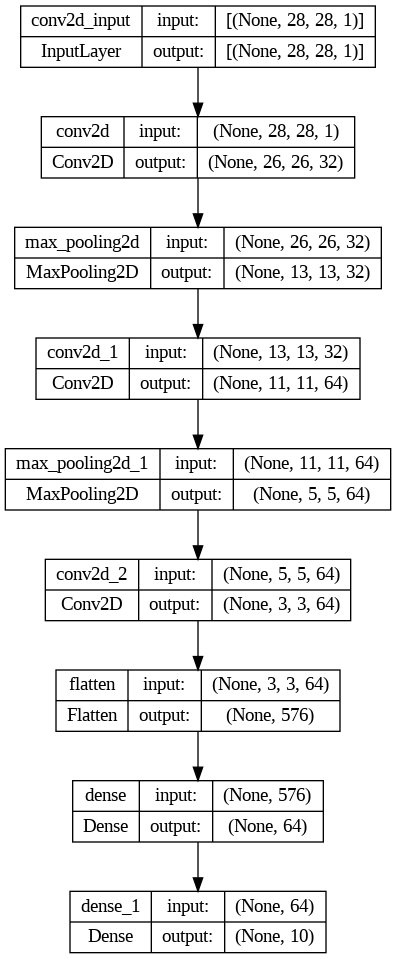

In [5]:
plot_model(model, to_file='convnet_ex_model_plot.png', show_shapes=True, show_layer_names=True)

# Training DL Models on MNIST Images

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
train_images[0].shape

(28, 28)

In [8]:
print(np.max(train_images)) # the values ranges between 0-255 (i.e. grayscale image)
print(np.min(train_images))

255
0


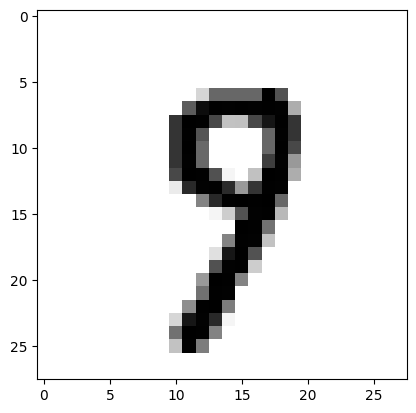

In [9]:
digit = train_images[1250]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

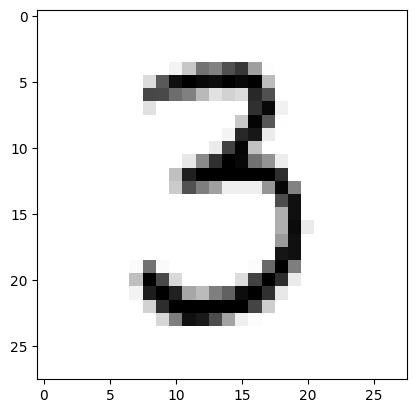

In [10]:
digit = train_images[50]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## Densely Connected Network

In [11]:
train_images_v0 = train_images.reshape((60000, 28*28)) # flatten 2D 28x28 images to 784x1 array
train_images_v0 = train_images_v0.astype('float32') / 255 # scale the values in 0-1 interval

test_images_v0 = test_images.reshape((10000, 28*28))
test_images_v0 = test_images_v0.astype('float32') / 255

train_labels_v0 = to_categorical(train_labels)
test_labels_v0 = to_categorical(test_labels)

In [12]:
print("train_labels:\t", train_labels.shape)
print("train_labels_v0:\t", train_labels_v0.shape)
print("train_images:\t", train_images.shape)
print("train_images_v0:\t", train_images_v0.shape)
print("train_images[0]:\t", train_images[0].shape)
print("train_images_v0[0]:\t", train_images_v0[0].shape)

train_labels:	 (60000,)
train_labels_v0:	 (60000, 10)
train_images:	 (60000, 28, 28)
train_images_v0:	 (60000, 784)
train_images[0]:	 (28, 28)
train_images_v0[0]:	 (784,)


In [13]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images_v0, train_labels_v0, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2676 - accuracy: 0.9234
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.1087 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0714 - accuracy: 0.9786
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0515 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0390 - accuracy: 0.9882


In [14]:
test_loss, test_acc = model.evaluate(test_images_v0, test_labels_v0)
print("test_loss: %s, test_acc: %s" %(np.round(test_loss,3), np.round(test_acc,3)))

313/313 [==============================] - 1s 3ms/step - loss: 0.0669 - accuracy: 0.9794
test_loss: 0.067, test_acc: 0.979


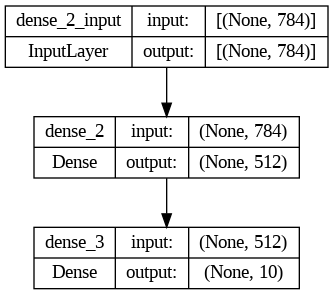

In [15]:
plot_model(model, to_file='mnist_dense_ex_model_plot.png', show_shapes=True, show_layer_names=True)

## Convnet

In [16]:
train_images_v1 = train_images.reshape((60000, 28, 28, 1)) # convert 2D 28x28 images to (28x28x1) tensors
train_images_v1 = train_images_v1.astype('float32') / 255 # scale the values in 0-1 interval

test_images_v1 = test_images.reshape((10000, 28, 28, 1))
test_images_v1 = test_images_v1.astype('float32') / 255

train_labels_v1 = to_categorical(train_labels)
test_labels_v1 = to_categorical(test_labels)

In [17]:
print("train_labels:\t", train_labels.shape)
print("train_labels_v1:\t", train_labels_v1.shape)
print("train_images:\t", train_images.shape)
print("train_images_v1:\t", train_images_v1.shape)
print("train_images[0]:\t", train_images[0].shape)
print("train_images_v1[0]:\t", train_images_v1[0].shape)

train_labels:	 (60000,)
train_labels_v1:	 (60000, 10)
train_images:	 (60000, 28, 28)
train_images_v1:	 (60000, 28, 28, 1)
train_images[0]:	 (28, 28)
train_images_v1[0]:	 (28, 28, 1)


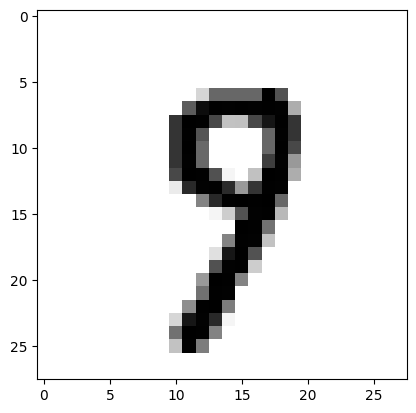

In [18]:
digit = train_images_v1[1250][:,:,0]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [24]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# adding a classifier on top of the convnet
# (3, 3, 64) outputs are flattened into vectors of shape (576,) before going through two Dense layers.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# 10-way classification, using a final layer with 10 outputs and a softmax activation
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


from tensorflow.keras.utils import plot_model
import pydot


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

## Building a Convnet Model


In [20]:
model.fit(train_images_v1, train_labels_v1, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 64s 67ms/step - loss: 0.1860 - accuracy: 0.9418
Epoch 2/5
938/938 [==============================] - 70s 75ms/step - loss: 0.0476 - accuracy: 0.9852
Epoch 3/5
938/938 [==============================] - 60s 64ms/step - loss: 0.0325 - accuracy: 0.9899
Epoch 4/5
938/938 [==============================] - 49s 52ms/step - loss: 0.0240 - accuracy: 0.9928
Epoch 5/5
938/938 [==============================] - 49s 52ms/step - loss: 0.0193 - accuracy: 0.9941


In [ ]:
test_loss, test_acc = model.evaluate(test_images_v1, test_labels_v1)
print("test_loss: %s, test_acc: %s" %(np.round(test_loss,3), np.round(test_acc,3)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9898 - loss: 0.0362
test_loss: 0.028, test_acc: 0.993


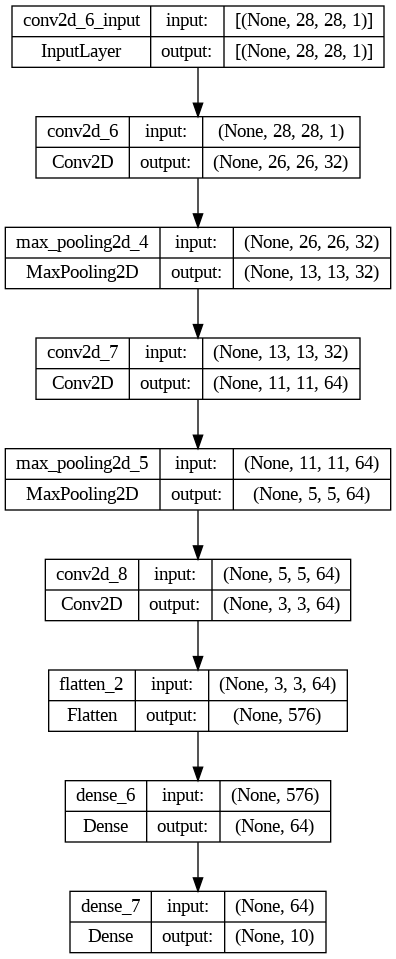

In [25]:
plot_model(model, to_file='mnist_convnet_model_plot.png', show_shapes=True, show_layer_names=True)